In [65]:
import numpy as np
import proplot as plot
from scipy.signal import savgol_filter
from savitzkygolay import filter2D

In [19]:
f = np.zeros((6,7))
f[2:4, 2:5] = 4
leise = np.array([[0.016, -0.047, -0.203, -0.281, -0.203, -0.047,  0.016],
                  [-0.047,  0.141,  0.609,  0.844,  0.609,  0.141, -0.047],
                  [-0.219,  0.656,  2.844,  3.938,  2.844,  0.656, -0.219],
                  [-0.219,  0.656,  2.844,  3.938,  2.844,  0.656, -0.219],
                  [-0.047,  0.141,  0.609,  0.844,  0.609,  0.141, -0.047],
                  [ 0.016, -0.047, -0.203, -0.281, -0.203, -0.047,  0.016]])
rmseleise = np.round(np.sqrt(((f-leise)**2).mean()),3)

In [83]:
filter_window, filter_order, mode = 7, 5, 'interp'

In [66]:
f_scipy = savgol_filter(f, filter_window, filter_order, axis=0, mode = mode)
f_scipy = savgol_filter(f_scipy, filter_window, filter_order, axis=1, mode = mode)
rmsescipy = np.round(np.sqrt(((f-f_scipy)**2).mean()),3)

diff = (f_scipy-leise)
rmsediff = np.round(np.sqrt((diff**2).mean()),3)

In [84]:
f_sav = filter2D(f, filter_window, filter_order)
rmsesav = np.round(np.sqrt(((f-f_sav)**2).mean()),3)

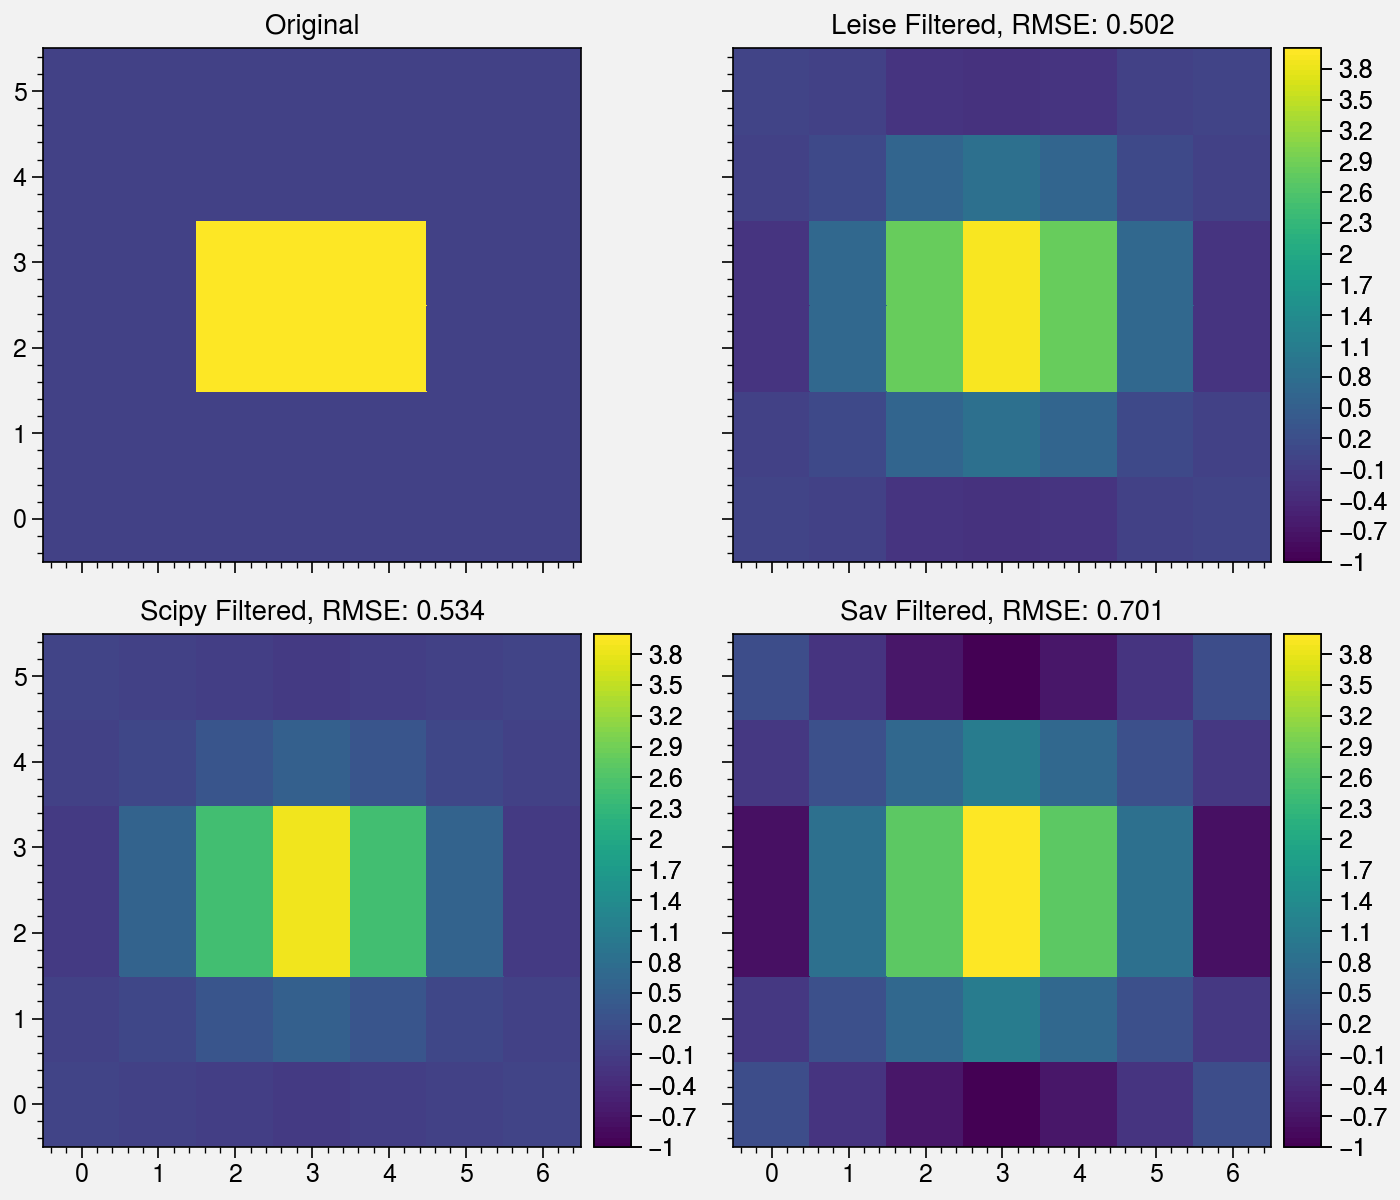

In [85]:
N =100
fig, axs = plot.subplots(nrows = 2, ncols = 2, figsize = (7,6))
axs[0].pcolormesh(f, vmin = -1, vmax = 4, cmap = 'viridis',N=N)
axs[0].format(title='Original')
axs[1].pcolormesh(leise, vmin = -1, vmax = 4, cmap = 'viridis', colorbar = 'r',N=N)
axs[1].format(title='Leise Filtered, RMSE: '+str(rmseleise))
axs[2].pcolormesh(f_scipy, vmin = -1, vmax = 4, cmap = 'viridis', colorbar = 'r',N=N)
axs[2].format(title='Scipy Filtered, RMSE: '+str(rmsescipy))
axs[3].pcolormesh(f_sav, vmin = -1, vmax = 4, cmap = 'viridis', colorbar = 'r',N=N)
axs[3].format(title='Sav Filtered, RMSE: '+str(rmsesav))